# Proyecto de Aprendizaje Automático

## Carga y análisis de los datos

In [1]:
# Se importan las librerias necesarias
import pandas as pd

In [3]:
# Se cargan los datos desde un archivo excel
df = pd.read_excel("../data/raw/SAT-SS-BU_2017-2022.xlsx")

In [5]:
# Se muestran las primeras 5 filas
df.head()

,id_hecho,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,tipo_lugar_ampliado,tipo_lugar_otro,modalidad,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,suicida_sexo,suicida_tr_edad,suicida_identidad_genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar


In [7]:
# Se eliminan las columnas que se consideran que no son necesarias para el proyecto
df_nuevo = df.drop(columns=['federal', 'provincia_id', 'departamento_id', 'departamento_nombre', 'localidad_id', 'localidad_nombre', 'fecha_hecho', 'hora_hecho', 'tipo_lugar', 'tipo_lugar_ampliado', 'tipo_lugar_otro', 'modalidad', 'modalidad_ampliado', 'modalidad_otro', 'motivo_origen_registro', 'motivo_origen_registro_otro', 'suicida_identidad_genero'], inplace=False)

In [9]:
# Se guarda el nuevo dataframe
df_nuevo.to_csv("../notebooks/datos_nuevos.csv", index=False) #aca hay que poner la ruta adonde se va a guardar el archivo
# Se muestra las primeras 5 filas del nuevo dataframe llamado 'df_nuevo'
df_nuevo.head()

,id_hecho,provincia_nombre,anio,mes,suicida_sexo,suicida_tr_edad
0,8529,La Pampa,2017,1,Masculino,20-24
1,8530,La Pampa,2017,1,Masculino,55-59
2,8569,Santa Cruz,2017,1,Masculino,15-19
3,8705,Neuquén,2017,1,Masculino,20-24
4,8706,Neuquén,2017,1,Masculino,20-24


In [11]:
# Verificar si hay datos nulos
df_nuevo.isnull().sum()

id_hecho            0
provincia_nombre    0
anio                0
mes                 0
suicida_sexo        0
suicida_tr_edad     0
dtype: int64

In [13]:
# Explorando los datos - Información básica sobre las columnas
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_hecho          21719 non-null  int64 
 1   provincia_nombre  21719 non-null  object
 2   anio              21719 non-null  int64 
 3   mes               21719 non-null  int64 
 4   suicida_sexo      21719 non-null  object
 5   suicida_tr_edad   21719 non-null  object
dtypes: int64(3), object(3)
memory usage: 1018.2+ KB


### Balanceo de las variables

In [16]:
# Balancear con submuestreo la variable suicida_tr_edad
# Contar instancias por rango de edad
age_distribution = df_nuevo['suicida_tr_edad'].value_counts()
print(age_distribution)

suicida_tr_edad
20-24             2967
25-29             2587
15-19             2343
30-34             2007
35-39             1645
40-44             1479
45-49             1204
50-54             1123
55-59             1035
60-64              993
Sin determinar     893
65-69              848
70-74              752
75-79              606
80-84              456
10-14              372
85-89              259
90 y más           137
5-9                 13
Name: count, dtype: int64


In [18]:
# Obtener el conteo mínimo entre las edades
min_count = age_distribution.min()

# Iterar sobre cada rango de edad y aplicar submuestreo
for age_group in df_nuevo['suicida_tr_edad'].unique():
    group_data = df_nuevo[df_nuevo['suicida_tr_edad'] == age_group]
    # Submuestrear al tamaño del grupo menor
    df_group_sampled = group_data.sample(n=min_count, random_state=42, replace=True)
    df_nuevo = pd.concat([df_nuevo, df_group_sampled])

# Reiniciar el índice del DataFrame resultante
df_nuevo.reset_index(drop=True, inplace=True)

In [20]:
print(df_nuevo['suicida_tr_edad'].value_counts())

suicida_tr_edad
20-24             2980
25-29             2600
15-19             2356
30-34             2020
35-39             1658
40-44             1492
45-49             1217
50-54             1136
55-59             1048
60-64             1006
Sin determinar     906
65-69              861
70-74              765
75-79              619
80-84              469
10-14              385
85-89              272
90 y más           150
5-9                 26
Name: count, dtype: int64


In [24]:
# Contar instancias por provincia
province_distribution = df_nuevo['provincia_nombre'].value_counts()
print(province_distribution)

provincia_nombre
Buenos Aires                                             6631
Santa Fe                                                 2157
Córdoba                                                  1494
Ciudad Autónoma de Buenos Aires                          1353
Entre Ríos                                               1313
Mendoza                                                  1204
Salta                                                    1113
Tucumán                                                   789
Santiago del Estero                                       714
Chaco                                                     655
Misiones                                                  552
Corrientes                                                421
Formosa                                                   392
San Juan                                                  379
Chubut                                                    378
Neuquén                                              

In [26]:
# Obtener el conteo mínimo entre las provincias
min_count = province_distribution.min()

# Iterar sobre cada provincia y aplicar submuestreo
for province in df_nuevo['provincia_nombre'].unique():
    group_data = df_nuevo[df_nuevo['provincia_nombre'] == province]
    # Submuestrear al tamaño del grupo menor
    df_group_sampled = group_data.sample(n=min_count, random_state=42, replace=True)
    df_nuevo = pd.concat([df_nuevo, df_group_sampled])

# Reiniciar el índice del DataFrame resultante
df_nuevo.reset_index(drop=True, inplace=True)

In [28]:
# Verificar el balanceo
print("Distribución después del submuestreo:")
print(df_nuevo['provincia_nombre'].value_counts())

Distribución después del submuestreo:
provincia_nombre
Buenos Aires                                             6726
Santa Fe                                                 2252
Córdoba                                                  1589
Ciudad Autónoma de Buenos Aires                          1448
Entre Ríos                                               1408
Mendoza                                                  1299
Salta                                                    1208
Tucumán                                                   884
Santiago del Estero                                       809
Chaco                                                     750
Misiones                                                  647
Corrientes                                                516
Formosa                                                   487
San Juan                                                  474
Chubut                                                    473
Neuquén        

In [30]:
# Eliminar filas donde la columna 'suicida_sexo' contiene 'Sin determinar'
df_nuevo = df_nuevo[df_nuevo['suicida_sexo'] != 'Sin determinar']

In [32]:
# Ver la distribución de la variable 'suicida_sexo'
distribucion = df_nuevo['suicida_sexo'].value_counts()
print(distribucion)

suicida_sexo
Masculino    19138
Femenino      4995
Name: count, dtype: int64


In [34]:
# Ver el ratio de desbalance de la variable 'suicida_sexo'
ratio_desbalance = (df_nuevo['suicida_sexo'].value_counts() / len(df)) * 100
print(ratio_desbalance)

suicida_sexo
Masculino    88.116396
Femenino     22.998296
Name: count, dtype: float64


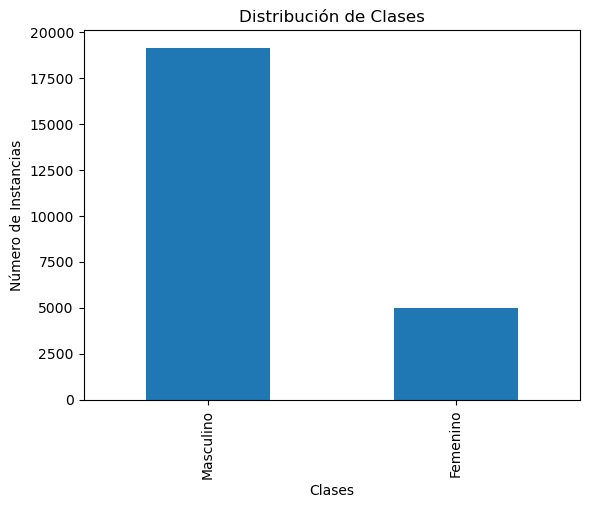

In [36]:
# Ver en un grafico el desbalance de la variable 'suicida_sexo'
import matplotlib.pyplot as plt

# Gráfico de barras
df_nuevo['suicida_sexo'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Número de Instancias')
plt.show()

### Manejo del desbalance de la variable objetivo
Con la técnica del submuestreo

In [39]:
# Determinar el tamaño del submuestreo
min_count = distribucion.min()  # Número de instancias en la clase minoritaria

In [41]:
df_majority = df_nuevo[df_nuevo['suicida_sexo'] == distribucion.idxmax()]  # Clase mayoritaria
df_minority = df_nuevo[df_nuevo['suicida_sexo'] == distribucion.idxmin()]  # Clase minoritaria

In [43]:
# Submuestrear la clase mayoritaria
df_majority_subsample = df_majority.sample(min_count, random_state=42)  # Aleatorio con reemplazo

In [45]:
# Combinar las clases
df_balanced = pd.concat([df_majority_subsample, df_minority])

In [47]:
# Mezclar el DataFrame resultante
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [49]:
# Verificar el balanceo
print(df_balanced['suicida_sexo'].value_counts())

suicida_sexo
Masculino    4995
Femenino     4995
Name: count, dtype: int64


In [51]:
# Codificación One-Hot para rangos de edad de la variable 'suicida_tr_edad'
df_balanced = pd.get_dummies(df_balanced, columns=['suicida_tr_edad'], drop_first=True)

In [53]:
# Codificación de variables categóricas como 'suicida_sexo' y 'provincia_nombre'
df_balanced['suicida_sexo'] = df_balanced['suicida_sexo'].map({'Masculino': 1, 'Femenino': 0})
df_balanced = pd.get_dummies(df_balanced, columns=['provincia_nombre'], drop_first=True)

### Se definen las variables dependientes e independientes a utilizar en el modelo

In [56]:
# Definir las variables dependientes e independientes:
X = df_balanced.drop("suicida_sexo", axis = 1)
y = df_balanced['suicida_sexo']

### Se divide el dataset en conjunto de entrenamiento y de prueba

In [59]:
# Division del dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest
Los datos se entrenan con el modelo de random forest y se hacen las predicciones

In [62]:
# Entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Instanciar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Hacer predicciones
y_pred = model.predict(X_test)

### Se utilizan metricas para evaluar el modelo de random forest

In [69]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(f'Reporte de Clasificación:\n{class_report}')

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1487
           1       0.58      0.53      0.56      1510

    accuracy                           0.57      2997
   macro avg       0.57      0.57      0.57      2997
weighted avg       0.57      0.57      0.57      2997



In [71]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión: {accuracy}')

Precisión: 0.5709042375709042


## Regresion Logistica
Los datos se entrenan con el modelo de regresión logística y se hacen las predicciones

In [74]:
# Escalar las características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_balanced)

In [78]:
# Modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Instanciar y entrenar el modelo
model = LogisticRegression()

In [80]:
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
# Hacer predicciones
y_pred = model.predict(X_test)

### Se utilizan metricas para evaluar el modelo de regresión logística

In [85]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.56


In [87]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[768 719]
 [591 919]]


In [89]:
# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1487
           1       0.56      0.61      0.58      1510

    accuracy                           0.56      2997
   macro avg       0.56      0.56      0.56      2997
weighted avg       0.56      0.56      0.56      2997



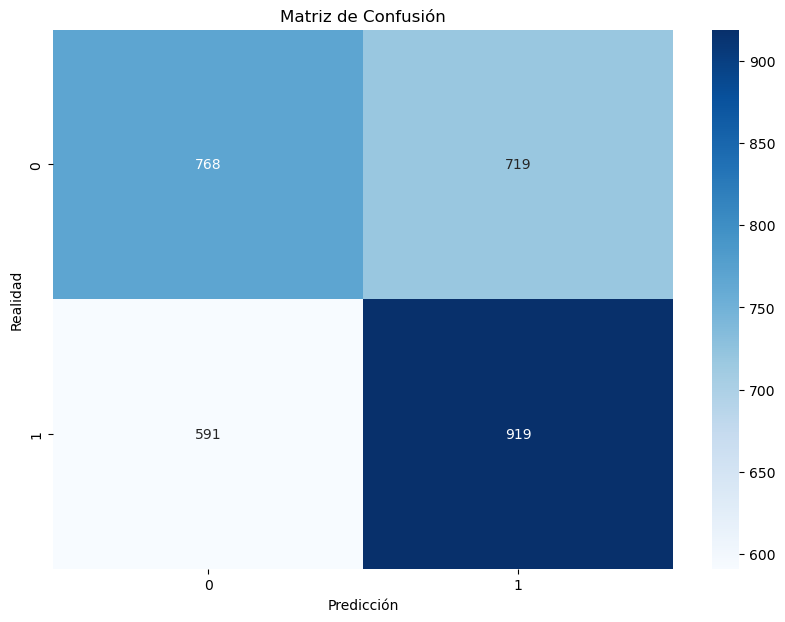

In [91]:
# Visualizar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

# Interpretacion de los resultados

En el reporte de clasificación del modelo utilizando random forest observando el accuracy, la precisión general del modelo es del 57%, esto indica que el modelo tiene un rendimiento moderado, ya que no supera el 60%. Observando el recall, para la clase 0 el modelo identificó correctamente el 61%, en cambio para la clase 1 fue del 58%. Observando el F1-Score, indica un rendimiento moderado para ambas clases.
En el reporte de clasificación del modelo utilizando la regresión logística observando la precision, la precisión general del modelo es del 56%. Observando el recall, para la clase 0 solo el 52% fueron identificados correctamente por el modelo, lo que indica que hay un número significativo de casos no detectados (falsos negativos), y para la clase 1 el modelo identificó correctamente el 61%. El F1-Score indica un rendimiento moderado del modelo.

# Conclusión

El rendimiento del modelo de regresión logística es similar al del modelo de Random Forest, lo que sugiere que la regresión logística no ha mejorado significativamente la clasificación.